<a href="https://colab.research.google.com/github/NourhanTamer20/Coffee_House_Survey/blob/main/coffee_house_satisfactory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [ ]:
import pandas as pd
import re
import numpy as np

**Read Dataset**

In [ ]:
#read dataset
coffe_data = pd.read_excel("/content/coffee-house-satisfactory-survey.xlsx")
coffe_data.head()

,Timestamp,1. Your Gender,2. Your Age,3. Are you currently....?,4. What is your annual income?,5. How often do you visit Coffee House?,6. How do you usually enjoy Coffee House?,7. How much time do you normally spend during your visit?,8. The nearest Coffee House's outlet to you is...?,9. Do you have Coffee House membership card?,...,"11. On average, how much would you spend at Coffee House per visit?","12. How would you rate the quality of Coffee House compared to other brands (Coffee Bean, Old Town White Coffee..) to be:",13. How would you rate the price range at Coffee House?,14. How important are sales and promotions in your purchase decision?,"15. How would you rate the ambiance at Coffee House? (lighting, music, etc...)",16. You rate the WiFi quality at Coffee House as..,"17. How would you rate the service at Coffee House? (Promptness, friendliness, etc..)",18. How likely you will choose Coffee House for doing business meetings or hangout with friends?,19. How do you come to hear of promotions at Coffee House? Check all that apply.,20. Will you continue buying Coffee House?
0,2019/10/01 12:38:43 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,...,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,2019/10/01 12:38:54 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,...,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,2019/10/01 12:38:56 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,...,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
3,2019/10/01 12:39:08 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,...,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No
4,2019/10/01 12:39:20 PM GMT+8,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,...,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes


In [ ]:
coffe_data

,Timestamp,1. Your Gender,2. Your Age,3. Are you currently....?,4. What is your annual income?,5. How often do you visit Coffee House?,6. How do you usually enjoy Coffee House?,7. How much time do you normally spend during your visit?,8. The nearest Coffee House's outlet to you is...?,9. Do you have Coffee House membership card?,...,"11. On average, how much would you spend at Coffee House per visit?","12. How would you rate the quality of Coffee House compared to other brands (Coffee Bean, Old Town White Coffee..) to be:",13. How would you rate the price range at Coffee House?,14. How important are sales and promotions in your purchase decision?,"15. How would you rate the ambiance at Coffee House? (lighting, music, etc...)",16. You rate the WiFi quality at Coffee House as..,"17. How would you rate the service at Coffee House? (Promptness, friendliness, etc..)",18. How likely you will choose Coffee House for doing business meetings or hangout with friends?,19. How do you come to hear of promotions at Coffee House? Check all that apply.,20. Will you continue buying Coffee House?
0,2019/10/01 12:38:43 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,...,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,2019/10/01 12:38:54 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,...,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,2019/10/01 12:38:56 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,...,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
3,2019/10/01 12:39:08 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,...,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No
4,2019/10/01 12:39:20 PM GMT+8,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,...,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2019/10/04 12:24:26 AM GMT+8,Male,40 and above,Self-employed,"RM25,000 - RM50,000",Monthly,Dine in,Between 1 hour to 2 hours,1km - 3km,Yes,...,Around RM20 - RM40,3,3,5,3,2,4,4,Starbucks Website/Apps;Social Media,Yes
118,2019/10/04 9:30:09 AM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 1 hour to 2 hours,1km - 3km,Yes,...,More than RM40,5,5,5,5,5,5,5,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
119,2019/10/04 1:46:07 PM GMT+8,Male,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,1km - 3km,No,...,Less than RM20,3,2,4,3,3,3,4,Social Media;Through friends and word of mouth...,No
120,2019/10/05 11:01:14 AM GMT+8,Female,From 20 to 29,Employed,"Less than RM25,000",Rarely,Take away,Below 30 minutes,within 1km,No,...,Less than RM20,4,4,4,4,4,4,4,Social Media;Through friends and word of mouth...,Yes


**Data Cleaning**

In [ ]:
##leave only years on Timestamp date
coffe_data['Timestamp'] = pd.DatetimeIndex(coffe_data['Timestamp']).year
coffe_data

,Timestamp,1. Your Gender,2. Your Age,3. Are you currently....?,4. What is your annual income?,5. How often do you visit Coffee House?,6. How do you usually enjoy Coffee House?,7. How much time do you normally spend during your visit?,8. The nearest Coffee House's outlet to you is...?,9. Do you have Coffee House membership card?,...,"11. On average, how much would you spend at Coffee House per visit?","12. How would you rate the quality of Coffee House compared to other brands (Coffee Bean, Old Town White Coffee..) to be:",13. How would you rate the price range at Coffee House?,14. How important are sales and promotions in your purchase decision?,"15. How would you rate the ambiance at Coffee House? (lighting, music, etc...)",16. You rate the WiFi quality at Coffee House as..,"17. How would you rate the service at Coffee House? (Promptness, friendliness, etc..)",18. How likely you will choose Coffee House for doing business meetings or hangout with friends?,19. How do you come to hear of promotions at Coffee House? Check all that apply.,20. Will you continue buying Coffee House?
0,2019,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,...,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,2019,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,...,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,2019,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,...,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
3,2019,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,...,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No
4,2019,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,...,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2019,Male,40 and above,Self-employed,"RM25,000 - RM50,000",Monthly,Dine in,Between 1 hour to 2 hours,1km - 3km,Yes,...,Around RM20 - RM40,3,3,5,3,2,4,4,Starbucks Website/Apps;Social Media,Yes
118,2019,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 1 hour to 2 hours,1km - 3km,Yes,...,More than RM40,5,5,5,5,5,5,5,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
119,2019,Male,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,1km - 3km,No,...,Less than RM20,3,2,4,3,3,3,4,Social Media;Through friends and word of mouth...,No
120,2019,Female,From 20 to 29,Employed,"Less than RM25,000",Rarely,Take away,Below 30 minutes,within 1km,No,...,Less than RM20,4,4,4,4,4,4,4,Social Media;Through friends and word of mouth...,Yes


In [ ]:
##Check For Null Values in  dataset
coffe_data.isnull().sum()

Timestamp                                                                                                                    0
1. Your Gender                                                                                                               0
2. Your Age                                                                                                                  0
3. Are you currently....?                                                                                                    0
4. What is your annual income?                                                                                               0
5. How often do you visit Coffee House?                                                                                      0
6. How do you usually enjoy Coffee House?                                                                                    1
7. How much time do you normally  spend during your visit?                                                     

In [ ]:
coffe_data = coffe_data.dropna()

In [ ]:
coffe_data.isnull().sum()

Timestamp                                                                                                                    0
1. Your Gender                                                                                                               0
2. Your Age                                                                                                                  0
3. Are you currently....?                                                                                                    0
4. What is your annual income?                                                                                               0
5. How often do you visit Coffee House?                                                                                      0
6. How do you usually enjoy Coffee House?                                                                                    0
7. How much time do you normally  spend during your visit?                                                     

In [ ]:
coffe_data.duplicated().sum() ## Will give us a number of duplicates

2

In [ ]:
coffe_data.drop_duplicates(inplace = True)

<ipython-input-9-0e5621a96572>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffe_data.drop_duplicates(inplace = True)


In [ ]:
coffe_data

,Timestamp,1. Your Gender,2. Your Age,3. Are you currently....?,4. What is your annual income?,5. How often do you visit Coffee House?,6. How do you usually enjoy Coffee House?,7. How much time do you normally spend during your visit?,8. The nearest Coffee House's outlet to you is...?,9. Do you have Coffee House membership card?,...,"11. On average, how much would you spend at Coffee House per visit?","12. How would you rate the quality of Coffee House compared to other brands (Coffee Bean, Old Town White Coffee..) to be:",13. How would you rate the price range at Coffee House?,14. How important are sales and promotions in your purchase decision?,"15. How would you rate the ambiance at Coffee House? (lighting, music, etc...)",16. You rate the WiFi quality at Coffee House as..,"17. How would you rate the service at Coffee House? (Promptness, friendliness, etc..)",18. How likely you will choose Coffee House for doing business meetings or hangout with friends?,19. How do you come to hear of promotions at Coffee House? Check all that apply.,20. Will you continue buying Coffee House?
0,2019,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,...,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,2019,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,...,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,2019,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,...,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
3,2019,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,...,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No
4,2019,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,...,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2019,Male,40 and above,Self-employed,"RM25,000 - RM50,000",Monthly,Dine in,Between 1 hour to 2 hours,1km - 3km,Yes,...,Around RM20 - RM40,3,3,5,3,2,4,4,Starbucks Website/Apps;Social Media,Yes
118,2019,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 1 hour to 2 hours,1km - 3km,Yes,...,More than RM40,5,5,5,5,5,5,5,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
119,2019,Male,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,1km - 3km,No,...,Less than RM20,3,2,4,3,3,3,4,Social Media;Through friends and word of mouth...,No
120,2019,Female,From 20 to 29,Employed,"Less than RM25,000",Rarely,Take away,Below 30 minutes,within 1km,No,...,Less than RM20,4,4,4,4,4,4,4,Social Media;Through friends and word of mouth...,Yes


In [ ]:
dt=pd.get_dummies(coffe_data,columns=["1. Your Gender","9. Do you have Coffee House membership card?","20. Will you continue buying Coffee House?"],drop_first=True)

In [ ]:
dt1 = dt.drop('7. How much time do you normally  spend during your visit?',axis=1)

In [ ]:
dt1

,Timestamp,2. Your Age,3. Are you currently....?,4. What is your annual income?,5. How often do you visit Coffee House?,6. How do you usually enjoy Coffee House?,8. The nearest Coffee House's outlet to you is...?,10. What do you most frequently purchase at Coffee House?,"11. On average, how much would you spend at Coffee House per visit?","12. How would you rate the quality of Coffee House compared to other brands (Coffee Bean, Old Town White Coffee..) to be:",13. How would you rate the price range at Coffee House?,14. How important are sales and promotions in your purchase decision?,"15. How would you rate the ambiance at Coffee House? (lighting, music, etc...)",16. You rate the WiFi quality at Coffee House as..,"17. How would you rate the service at Coffee House? (Promptness, friendliness, etc..)",18. How likely you will choose Coffee House for doing business meetings or hangout with friends?,19. How do you come to hear of promotions at Coffee House? Check all that apply.,1. Your Gender_Male,9. Do you have Coffee House membership card?_Yes,20. Will you continue buying Coffee House?_Yes
0,2019,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,within 1km,Coffee,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,0,1,1
1,2019,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,1km - 3km,Cold drinks;Pastries,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,0,1,1
2,2019,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,more than 3km,Coffee,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,1,1,1
3,2019,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,more than 3km,Coffee,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,0,0,0
4,2019,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,1km - 3km,Coffee;Sandwiches,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2019,40 and above,Self-employed,"RM25,000 - RM50,000",Monthly,Dine in,1km - 3km,Coffee,Around RM20 - RM40,3,3,5,3,2,4,4,Starbucks Website/Apps;Social Media,1,1,1
118,2019,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,1km - 3km,Coffee;Cold drinks;Juices;Pastries;Sandwiches,More than RM40,5,5,5,5,5,5,5,Starbucks Website/Apps;Social Media;Emails;Dea...,1,1,1
119,2019,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,1km - 3km,Coffee;Cold drinks,Less than RM20,3,2,4,3,3,3,4,Social Media;Through friends and word of mouth...,1,0,0
120,2019,From 20 to 29,Employed,"Less than RM25,000",Rarely,Take away,within 1km,Coffee,Less than RM20,4,4,4,4,4,4,4,Social Media;Through friends and word of mouth...,0,0,1


In [ ]:
print(dt1['1. Your Gender_Male'].value_counts())

0    63
1    56
Name: 1. Your Gender_Male, dtype: int64


In [ ]:
print(dt1['9. Do you have Coffee House membership card?_Yes'].value_counts())

0    60
1    59
Name: 9. Do you have Coffee House membership card?_Yes, dtype: int64


In [ ]:
print(dt1['20. Will you continue buying Coffee House?_Yes'].value_counts())

1    92
0    27
Name: 20. Will you continue buying Coffee House?_Yes, dtype: int64


**Check For Outliers**

In [ ]:
import plotly.express as px

In [ ]:
#create a box plot

fig = px.box(dt1, y="13. How would you rate the price range at Coffee House?")

fig.show()

In [ ]:
#create a box plot

fig = px.box(dt1, y="14. How important are sales and promotions in your purchase decision?")

fig.show()

In [ ]:
#create a box plot

fig = px.box(dt1, y="15. How would you rate the ambiance at Coffee House? (lighting, music, etc...)")

fig.show()

In [ ]:
''' Detection '''
# IQR
# Calculate the upper and lower limits
Q1 = dt1['15. How would you rate the ambiance at Coffee House? (lighting, music, etc...)'].quantile(0.25)
Q3 = dt1['15. How would you rate the ambiance at Coffee House? (lighting, music, etc...)'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(dt1['15. How would you rate the ambiance at Coffee House? (lighting, music, etc...)']>=upper)[0]
lower_array = np.where(dt1['15. How would you rate the ambiance at Coffee House? (lighting, music, etc...)']<=lower)[0]

# Removing the outliers
dt1.drop(index=upper_array, inplace=True)
dt1.drop(index=lower_array, inplace=True)

# Print the new shape of the DataFrame
print("New Shape: ", dt1.shape)

New Shape:  (116, 20)


In [ ]:
#create a box plot

fig = px.box(dt1, y="16. You rate the WiFi quality at Coffee House as..")

fig.show()

In [ ]:
''' Detection '''
# IQR
# Calculate the upper and lower limits
Q1 = dt1['16. You rate the WiFi quality at Coffee House as..'].quantile(0.25)
Q3 = dt1['16. You rate the WiFi quality at Coffee House as..'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(dt1['16. You rate the WiFi quality at Coffee House as..']>=upper)[0]
lower_array = np.where(dt1['16. You rate the WiFi quality at Coffee House as..']<=lower)[0]

# Removing the outliers
dt1.drop(index=upper_array, inplace=True)
dt1.drop(index=lower_array, inplace=True)

# Print the new shape of the DataFrame
print("New Shape: ", dt1.shape)

New Shape:  (109, 20)


In [ ]:
#create a box plot

fig = px.box(dt1, y="17. How would you rate the service at Coffee House? (Promptness, friendliness, etc..)")

fig.show()

In [ ]:
''' Detection '''
# IQR
# Calculate the upper and lower limits
Q1 = dt1['17. How would you rate the service at Coffee House? (Promptness, friendliness, etc..)'].quantile(0.25)
Q3 = dt1['17. How would you rate the service at Coffee House? (Promptness, friendliness, etc..)'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(dt1['17. How would you rate the service at Coffee House? (Promptness, friendliness, etc..)']>=upper)[0]
lower_array = np.where(dt1['17. How would you rate the service at Coffee House? (Promptness, friendliness, etc..)']<=lower)[0]

# Removing the outliers
dt1.drop(index=upper_array, inplace=True)
dt1.drop(index=lower_array, inplace=True)

# Print the new shape of the DataFrame
print("New Shape: ", dt1.shape)

New Shape:  (108, 20)


**Data Exploration**

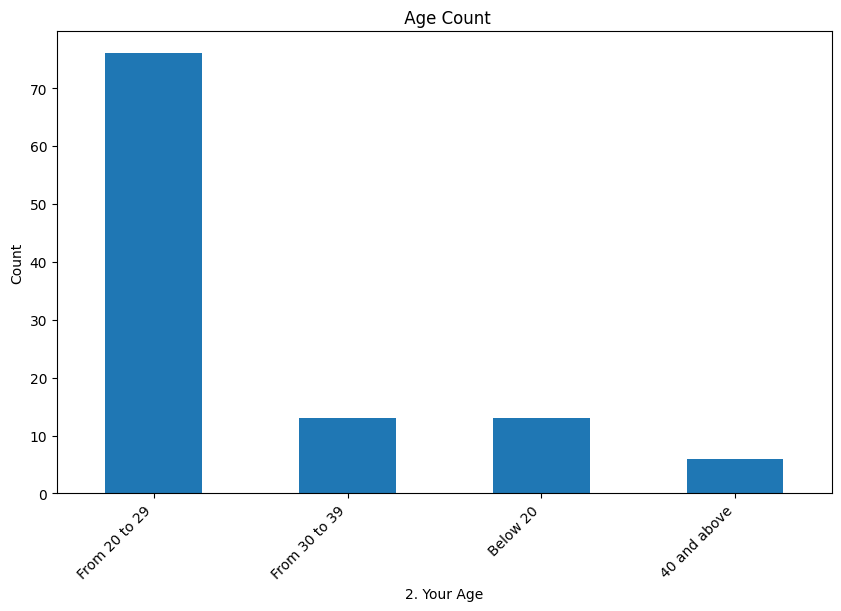

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
Exited_counts = dt1["2. Your Age"].value_counts()
Exited_counts.plot(kind="bar")
plt.xlabel("2. Your Age")
plt.ylabel("Count")
plt.title(" Age Count")
plt.xticks(rotation=45, ha='right')
plt.show()

<Axes: ylabel='1. Your Gender_Male'>

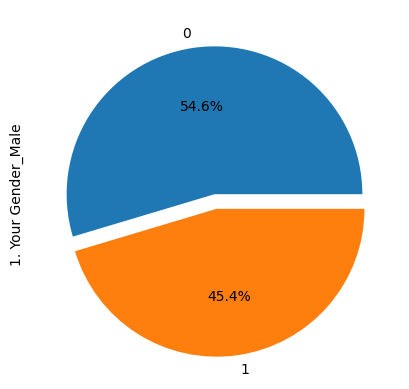

In [ ]:
# Plotting the pie chart for gender
dt1['1. Your Gender_Male'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%')

<Axes: ylabel='9. Do you have Coffee House membership card?_Yes'>

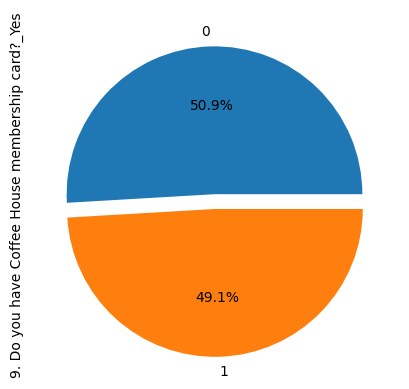

In [ ]:
# Plotting the pie chart for membership
dt1['9. Do you have Coffee House membership card?_Yes'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%')

<Axes: ylabel='20. Will you continue buying Coffee House?_Yes'>

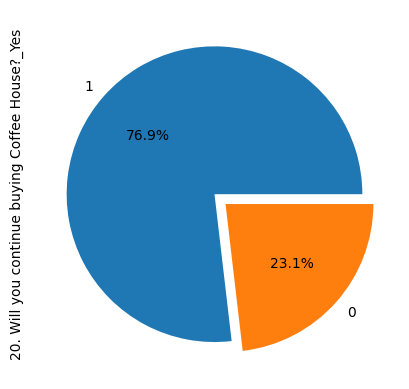

In [ ]:
# Plotting the pie chart for buying from the house
dt1['20. Will you continue buying Coffee House?_Yes'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%')

<Axes: ylabel='3. Are you currently....?'>

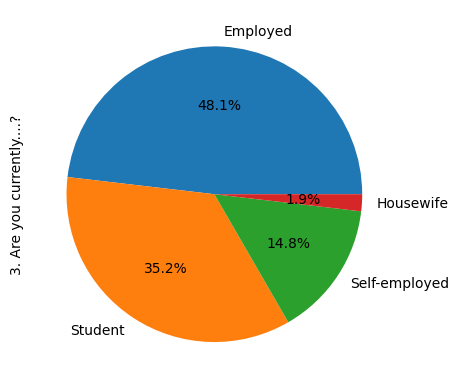

In [ ]:
dt1['3. Are you currently....?'].value_counts().plot.pie(autopct='%1.1f%%')

<Axes: ylabel='5. How often do you visit Coffee House?'>

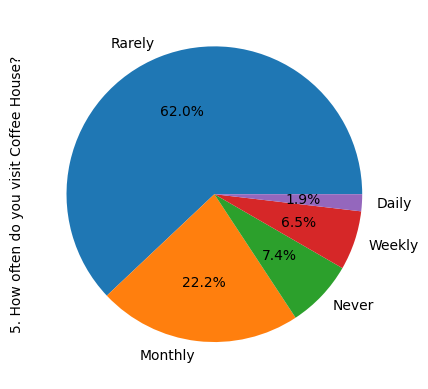

In [ ]:
dt1['5. How often do you visit Coffee House?'].value_counts().plot.pie(autopct='%1.1f%%')

<Axes: ylabel='6. How do you usually enjoy Coffee House?'>

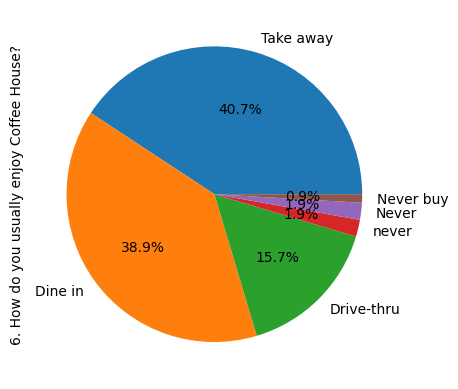

In [ ]:
dt1['6. How do you usually enjoy Coffee House?'].value_counts().plot.pie(autopct='%1.1f%%')

<Axes: ylabel="8. The nearest Coffee House's outlet to you is...?">

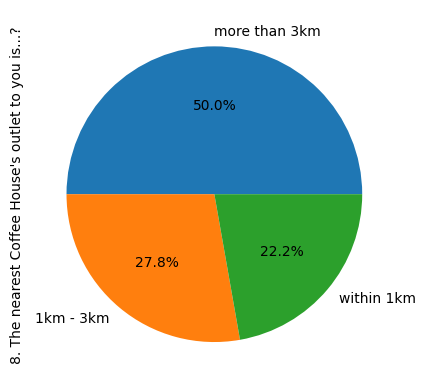

In [ ]:
dt1["8. The nearest Coffee House's outlet to you is...?"].value_counts().plot.pie(autopct='%1.1f%%')


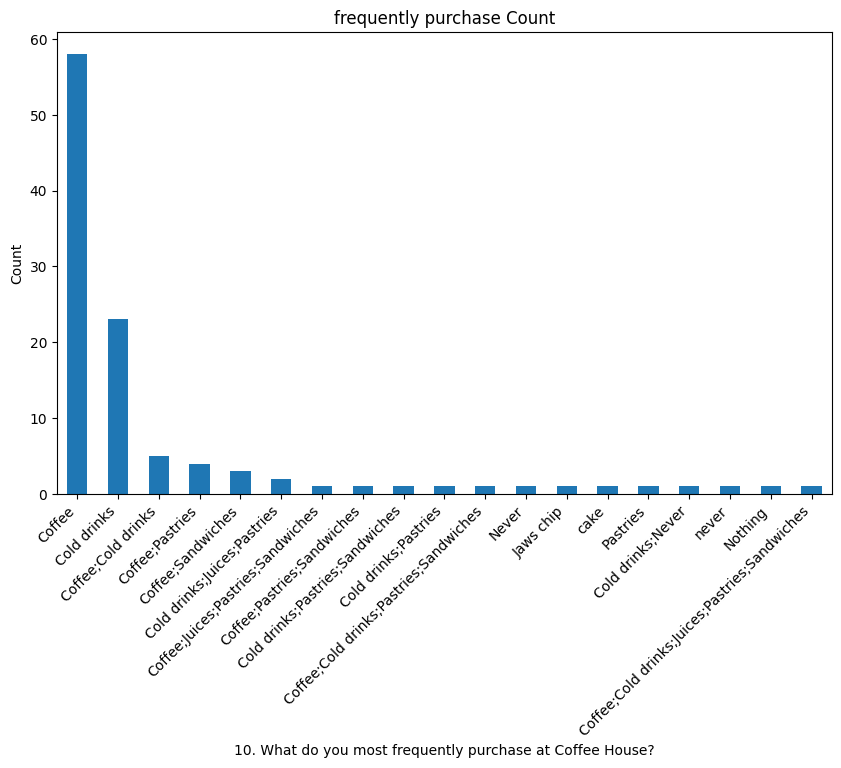

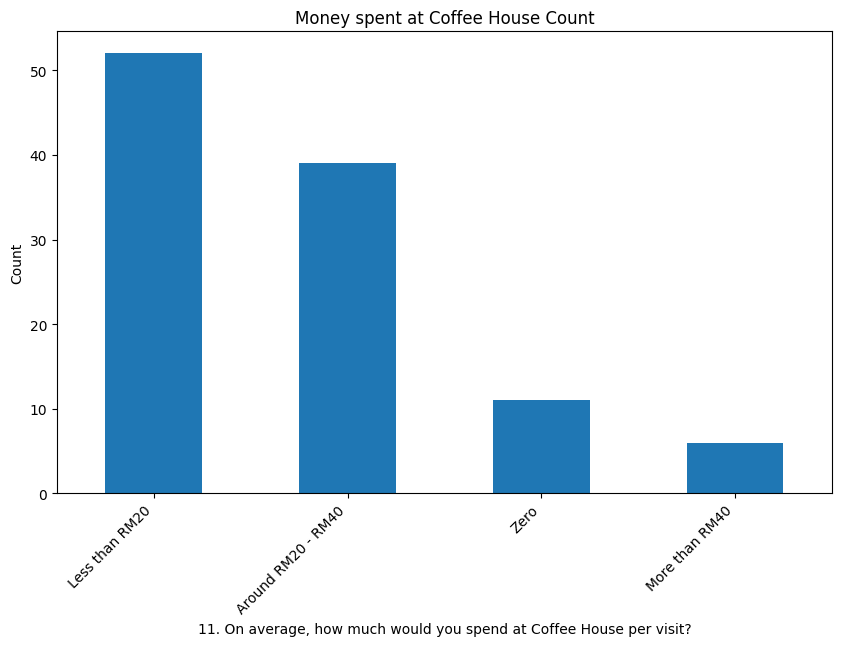

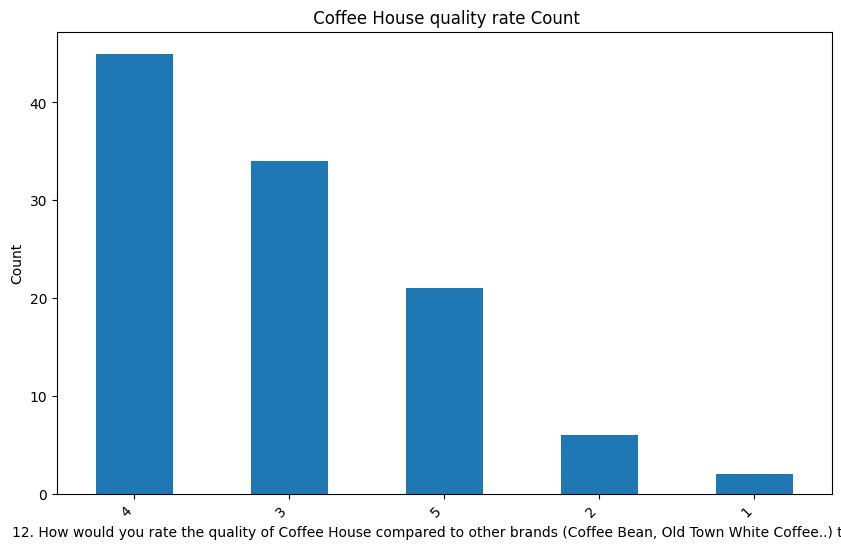

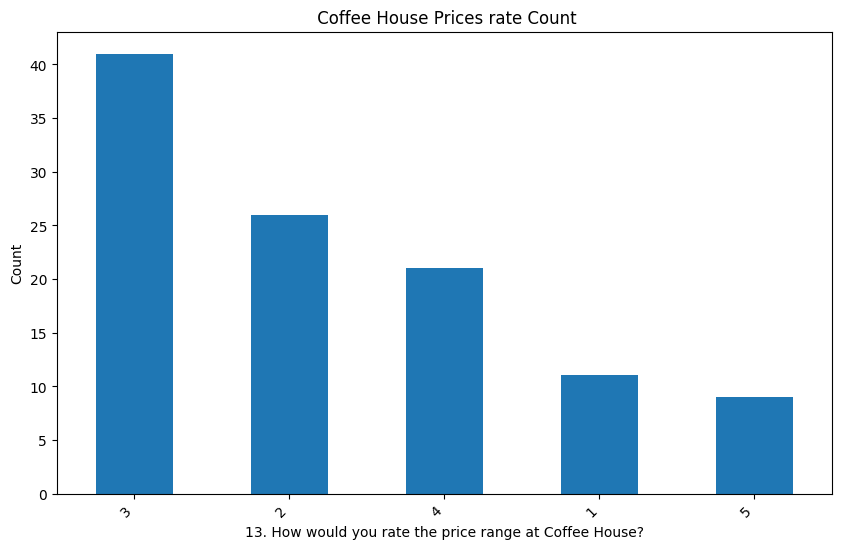

In [ ]:
plt.figure(figsize=(10, 6))
Exited_counts = dt1["10. What do you most frequently purchase at Coffee House?"].value_counts()
Exited_counts.plot(kind="bar")
plt.xlabel("10. What do you most frequently purchase at Coffee House?")
plt.ylabel("Count")
plt.title("frequently purchase Count")
plt.xticks(rotation=45, ha='right')
plt.show()


plt.figure(figsize=(10, 6))
Exited_counts = dt1["11. On average, how much would you spend at Coffee House per visit?"].value_counts()
Exited_counts.plot(kind="bar")
plt.xlabel("11. On average, how much would you spend at Coffee House per visit?")
plt.ylabel("Count")
plt.title("Money spent at Coffee House Count")
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(10, 6))
Exited_counts = dt1["12. How would you rate the quality of Coffee House compared to other brands (Coffee Bean, Old Town White Coffee..) to be:"].value_counts()
Exited_counts.plot(kind="bar")
plt.xlabel("12. How would you rate the quality of Coffee House compared to other brands (Coffee Bean, Old Town White Coffee..) to be:")
plt.ylabel("Count")
plt.title(" Coffee House quality rate Count")
plt.xticks(rotation=45, ha='right')
plt.show()


plt.figure(figsize=(10, 6))
Exited_counts = dt1["13. How would you rate the price range at Coffee House?"].value_counts()
Exited_counts.plot(kind="bar")
plt.xlabel("13. How would you rate the price range at Coffee House?")
plt.ylabel("Count")
plt.title(" Coffee House Prices rate Count")
plt.xticks(rotation=45, ha='right')
plt.show()


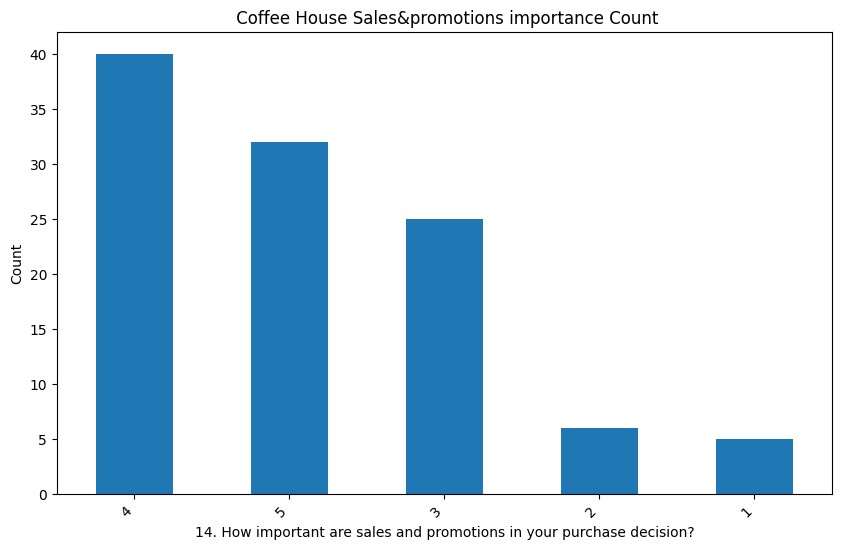

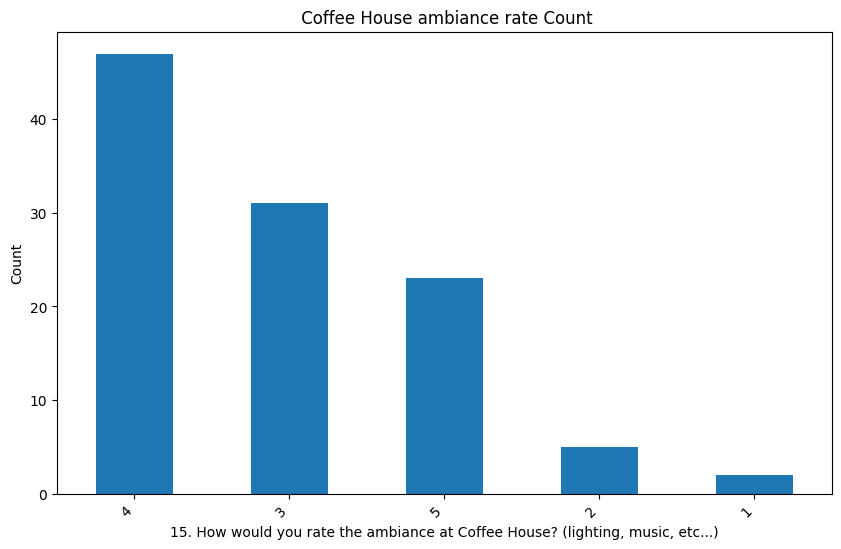

In [ ]:
plt.figure(figsize=(10, 6))
Exited_counts = dt1["14. How important are sales and promotions in your purchase decision?"].value_counts()
Exited_counts.plot(kind="bar")
plt.xlabel("14. How important are sales and promotions in your purchase decision?")
plt.ylabel("Count")
plt.title(" Coffee House Sales&promotions importance Count")
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(10, 6))
Exited_counts = dt1["15. How would you rate the ambiance at Coffee House? (lighting, music, etc...)"].value_counts()
Exited_counts.plot(kind="bar")
plt.xlabel("15. How would you rate the ambiance at Coffee House? (lighting, music, etc...)")
plt.ylabel("Count")
plt.title(" Coffee House ambiance rate Count")
plt.xticks(rotation=45, ha='right')
plt.show()

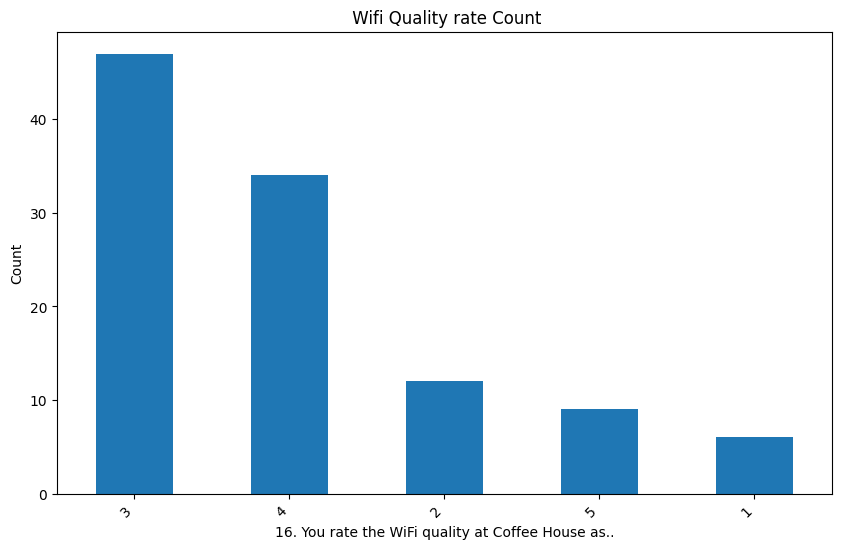

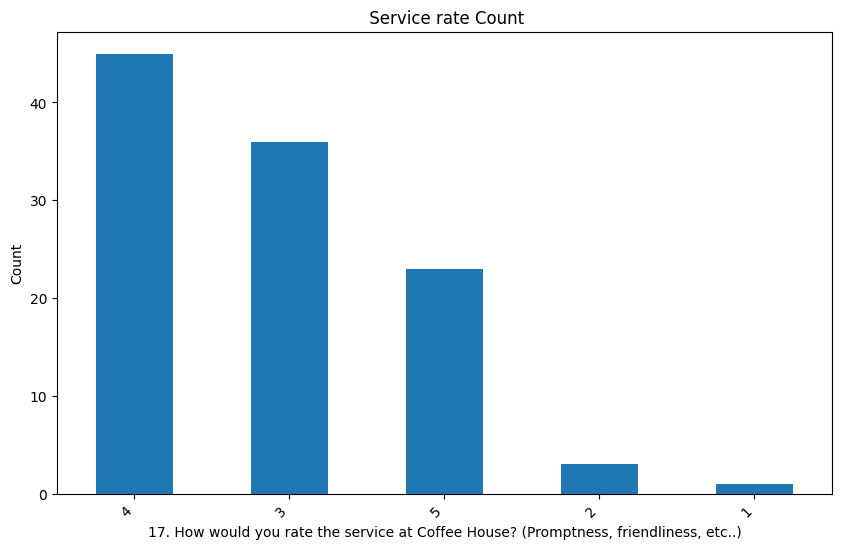

In [ ]:
plt.figure(figsize=(10, 6))
Exited_counts = dt1["16. You rate the WiFi quality at Coffee House as.."].value_counts()
Exited_counts.plot(kind="bar")
plt.xlabel("16. You rate the WiFi quality at Coffee House as..")
plt.ylabel("Count")
plt.title(" Wifi Quality rate Count")
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(10, 6))
Exited_counts = dt1["17. How would you rate the service at Coffee House? (Promptness, friendliness, etc..)"].value_counts()
Exited_counts.plot(kind="bar")
plt.xlabel("17. How would you rate the service at Coffee House? (Promptness, friendliness, etc..)")
plt.ylabel("Count")
plt.title(" Service rate Count")
plt.xticks(rotation=45, ha='right')
plt.show()

<Axes: ylabel='18. How likely you will choose Coffee House for doing business meetings or hangout with friends?'>

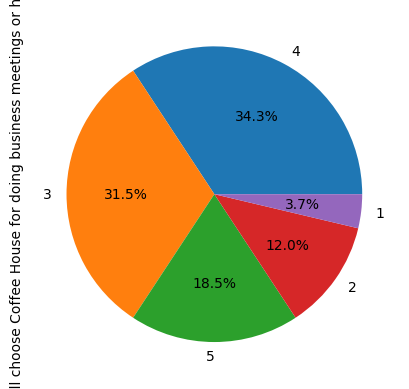

In [ ]:
dt1["18. How likely you will choose Coffee House for doing business meetings or hangout with friends?"].value_counts().plot.pie(autopct='%1.1f%%')

In [ ]:
"""
1-Age of most of the visitors of the coffee house are between 20 to 29
2-Female visitors represent 45.4% (56 visitors)
3-76.9% of visitors will continue buying from coffee house
4-50.9% of the visitors don't have membership card
5-48.1% of visitors are Employed
6-62% of visitors rarely visit coffee house
7-40.7% of visitors take away their orders
8-for 50% of the visitors the nearest coffee house outlet lies away more than 3 km
9-coffee&Cold Drinks are the most purchased products
10-Most of the customers spend less than RM20 at the house
11-Most of the people gave a rate of 4 for the house's quality compared to other places
12-Most of the people gave a rate of 4 for the effect of sales&promotions on their purchase decision
13-Most of the people gave a rate of 4 for the ambiance at coffee house
14-Most of the people gave a rate of 4 for the service
15-Most of the people gave a rate of 3 for the wifi quality
16-Most of the people gave a rate of 3 for the house's price range
17-34.3% of visitors gave a rate of 4 for chosing coffee house for doing business meetings or hanging out with friends
"""

"\n1-Age of most of the visitors of the coffee house are between 20 to 29\n2-Female visitors represent 45.4% (56 visitors)\n3-76.9% of visitors will continue buying from coffee house\n4-50.9% of the visitors don't have membership card\n5-48.1% of visitors are Employed\n6-62% of visitors rarely visit coffee house\n7-40.7% of visitors take away their orders\n8-for 50% of the visitors the nearest coffee house outlet lies away more than 3 km\n9-coffee&Cold Drinks are the most purchased products\n10-Most of the customers spend less than RM20 at the house\n11-Most of the people gave a rate of 4 for the house's quality compared to other places\n12-Most of the people gave a rate of 4 for the effect of sales&promotions on their purchase decision\n13-Most of the people gave a rate of 4 for the ambiance at coffee house\n14-Most of the people gave a rate of 4 for the service\n15-Most of the people gave a rate of 3 for the wifi quality\n16-Most of the people gave a rate of 3 for the house's price r

**Random Forest Model**

In [ ]:
data = dt1.drop(["2. Your Age","3. Are you currently....?","4. What is your annual income?","5. How often do you visit Coffee House?","6. How do you usually enjoy Coffee House?","8. The nearest Coffee House's outlet to you is...?","10. What do you most frequently purchase at Coffee House?","11. On average, how much would you spend at Coffee House per visit?","19. How do you come to hear of promotions at Coffee House? Check all that apply."] , axis = 1)

In [ ]:
# Putting feature variable to X
X = data.drop('20. Will you continue buying Coffee House?_Yes',axis=1)
# Putting response variable to y
y = data['20. Will you continue buying Coffee House?_Yes']

In [ ]:
# now lets split the data into train and test
from sklearn.model_selection import train_test_split

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((75, 10), (33, 10))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.7878787878787878
Precision: 0.7741935483870968
Recall: 1.0


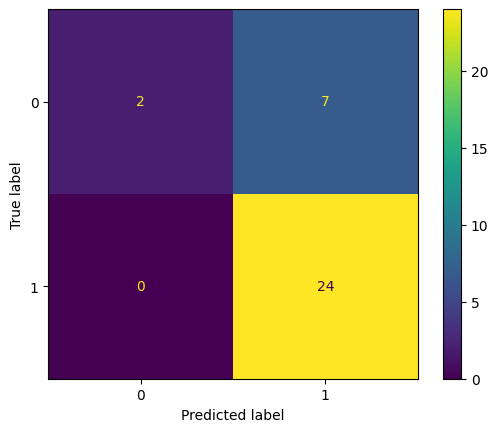

In [ ]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();